In [58]:
import datetime as dt
import numpy as np
import pandas as pd
from datetime import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc,extract
from sqlalchemy.sql import label

from flask import Flask, jsonify

import matplotlib.pyplot as plt

In [59]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [60]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [61]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [62]:
session = Session(bind = engine)

In [63]:
prcp_results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_of_precipitation_data=prcp_results
#last_12_months_of_precipitation_data

In [64]:
date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
#prcp_df.head(5)

In [65]:
prcp_list = prcp_df["prcp"].tolist()

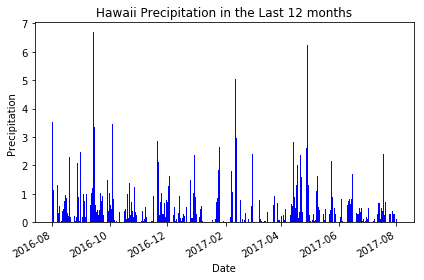

In [66]:
fig, ax = plt.subplots()
ax.bar(prcp_df.index.get_values(), prcp_list,color='b',align='center', label="Precipitation")
ax.xaxis_date()
fig.autofmt_xdate()
plt.title('Hawaii Precipitation in the Last 12 months')
plt.xlabel('Date')
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()

In [67]:
def calc_temps(start_date, end_date):
     
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
#print(calc_temps('2017-02-28', '2017-03-05'))

In [68]:
temperatures = (calc_temps('2017-02-28', '2017-03-31'))
labels = ['TMIN', 'TAVE', 'TMAX']
df = pd.DataFrame.from_records(temperatures, columns=labels)

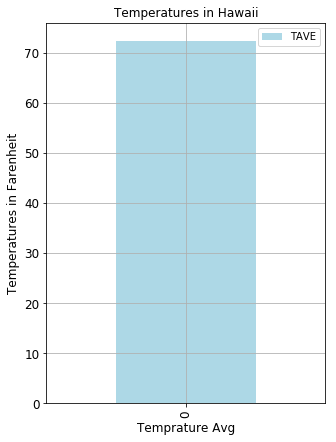

In [69]:
temp_chart = df[['TAVE']].plot(kind='bar', title ="Temperatures in Hawaii", figsize=(5, 7), legend=True, fontsize=12, grid=True, color='lightblue')
temp_chart.set_xlabel("Temprature Avg", fontsize=12)
temp_chart.set_ylabel("Temperatures in Farenheit", fontsize=12)
plt.show()

In [70]:
stations_results = session.query(func.count(Stations.station)).all()
#print("There are " + str(stations_results[0]) + " stations.")

In [71]:
active_results = session.query(Measurements.station,
    label('date', func.count(Measurements.date))).group_by(Measurements.station).all()
#for result in active_results:
 #   print(result)

In [72]:
desc_order = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc())
#for result in desc_order:
#    print(result)

In [73]:
obsv_num = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).first()
#print(obsv_num)

In [74]:
temps = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.date > '2017-01-06').\
    order_by(Measurements.date).all()
#temps

In [75]:
highest_obs = session.query(Measurements.station, Measurements.tobs).\
    filter(Measurements.date > '2017-01-01').\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.tobs).desc()).all()
#highest_obs

In [76]:
df = pd.DataFrame(temps, columns=['Station', 'date', 'temp'])
df.set_index('Station', inplace=True)
#df.head()

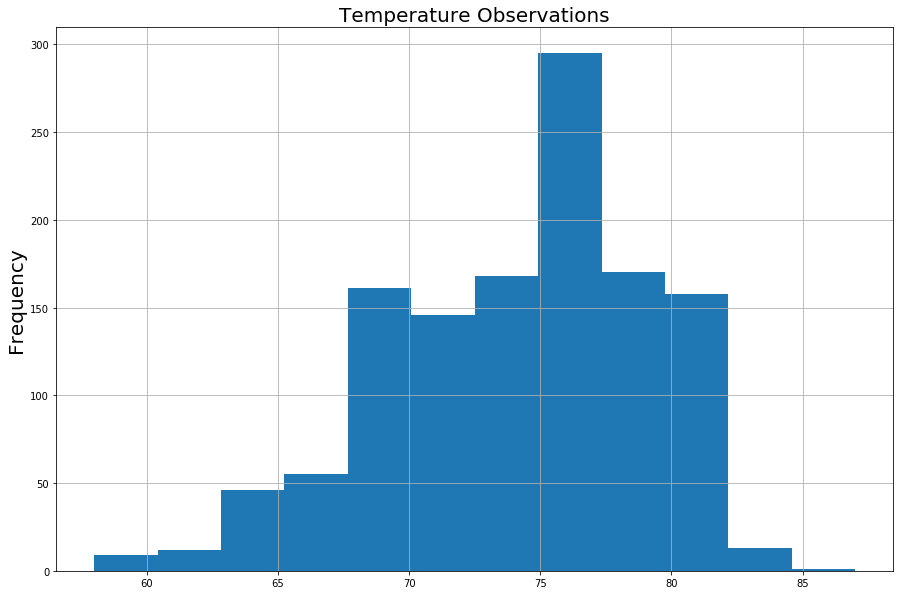

In [77]:
hist_plot = df['temp'].hist(bins=12, figsize=(15,10))
hist_plot.set_title('Temperature Observations', fontsize=20)
hist_plot.set_ylabel('Frequency', fontsize=20)
plt.show()

In [84]:
Rainfall_results = session.query(Measurements.station, func.count(Measurements.prcp)).\
                   group_by(Measurements.station).filter(Measurements.date.between('2016-08-01', '2017-08-01')).all()
#Rainfall_results

In [85]:
trip_month=7
trip_days=range(1, 16)
for i in range(1, 16):
    subquery=session.query(Measurements.date).filter(extract('month', Measurements.date)==trip_month).\
             filter(extract('day', Measurements.date)== i ).group_by(Measurements.date).order_by(Measurements.date).all()
#subquery

In [90]:
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month=7
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(Measurements.date.label("dates"), func.max(Measurements.tobs).label("max_tobs"),\
                             func.min(Measurements.tobs).label("min_tobs"),func.avg(Measurements.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurements.date)==trip_month).\
                             filter(extract('day', Measurements.date)== i ).group_by(Measurements.date).order_by(Measurements.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()

(datetime.date(2010, 7, 1), 75.0, 70.0, 72.75)
(datetime.date(2011, 7, 1), 81.0, 68.0, 73.875)
(datetime.date(2012, 7, 1), 78.0, 72.0, 76.33333333333333)
(datetime.date(2013, 7, 1), 78.0, 68.0, 74.0)
(datetime.date(2014, 7, 1), 79.0, 70.0, 76.33333333333333)
(datetime.date(2015, 7, 1), 80.0, 68.0, 74.6)
(datetime.date(2016, 7, 1), 79.0, 76.0, 77.25)
(datetime.date(2017, 7, 1), 80.0, 74.0, 77.25)
(datetime.date(2010, 7, 2), 77.0, 69.0, 72.0)
(datetime.date(2011, 7, 2), 79.0, 73.0, 76.0)
(datetime.date(2012, 7, 2), 77.0, 71.0, 74.42857142857143)
(datetime.date(2013, 7, 2), 77.0, 69.0, 73.375)
(datetime.date(2014, 7, 2), 82.0, 68.0, 75.57142857142857)
(datetime.date(2015, 7, 2), 81.0, 68.0, 77.6)
(datetime.date(2016, 7, 2), 79.0, 77.0, 78.33333333333333)
(datetime.date(2017, 7, 2), 81.0, 77.0, 79.0)
(datetime.date(2010, 7, 3), 77.0, 69.0, 73.57142857142857)
(datetime.date(2011, 7, 3), 78.0, 71.0, 75.66666666666667)
(datetime.date(2012, 7, 3), 76.0, 68.0, 72.71428571428571)
(datetime.date(

In [91]:
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TAVG,TMAX,TMIN
Date,,,
2017-07-01,77.25,80.0,74.0
2017-07-02,79.00,81.0,77.0
2017-07-03,77.80,81.0,76.0
2017-07-04,78.00,80.0,77.0
2017-07-05,77.25,80.0,75.0


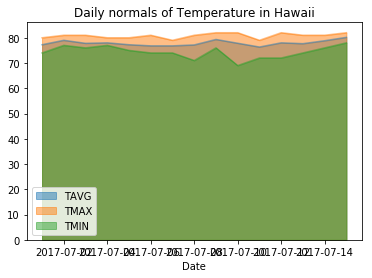

In [92]:
Daily_normals_df.plot.area(stacked=False, title='Daily normals of Temperature in Hawaii')
ax.set_xlabel('Date')
plt.show()

In [93]:
app = Flask(__name__)

In [94]:
from sqlalchemy import create_engine, func , inspect, desc
engine = create_engine('sqlite:///hawaii.sqlite')

from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)
from sqlalchemy.orm import Session

session=Session(bind=engine)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [95]:
@app.route("/")
def welcome():
    return ("<h1>Hawaii Surf's Up API!</h1>" 
            "<i>Make sure your start and end dates are formatted (Year-Month-Day)</i>"
            "<h2>Available Routes</h2>" 
            "<li><a href ='/api/v1.0/precipitation'>precipitation</a></li>"
            "<li><a href ='/api/v1.0/stations'>stations</a></li>"
            "<li><a href ='/api/v1.0/tobs'>tobs</a></li>"
            "<li><a href = '/api/v1.0/calc_temps/<start>/<end>'>Calc Temps</a></li>");


In [96]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    
    results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date <= "2016-01-01", Measurement.date >= "2016-01-01").\
        all()

    precipitation_list = [results]

    return jsonify(precipitation_list)

In [97]:
@app.route('/api/v1.0/stations')
def stations():
 results = session.query(Station.name, Station.station, Station.elevation).all()

    
 station_list = []
 for result in results:
        row = {}
        row['name'] = result[0]
        row['station'] = result[1]
        row['elevation'] = result[2]
        station_list.append(row)
 return jsonify(station_list)

In [98]:
@app.route("/api/v1.0/tobs")
def temp_obs():
    
 results = session.query(Station.name, Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= "2016-01-01", Measurement.date <= "2017-01-01").\
        all()

    
 tobs_list = []
 for result in results:
        row = {}
        row["Date"] = result[1]
        row["Station"] = result[0]
        row["Temperature"] = int(result[2])
        tobs_list.append(row)

 return jsonify(tobs_list)

In [99]:
@app.route('/api/v1.0/<date>/')
def given_date(date):
 results = session.query(Measurement.date, func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
        filter(Measurement.date == date).all()


 data_list = []
 for result in results:
        row = {}
        row['Date'] = result[0]
        row['Average Temperature'] = str(result[1])
        row['Highest Temperature'] = str(result[2])
        row['Lowest Temperature'] = str(result[3])
        data_list.append(row)
 return jsonify(data_list)

In [100]:
@app.route("/api/v1.0/calc_temps/<start>")

def calc_temps(start='start_date'):
    start_date = datetime.strptime('2016-08-01', '%Y-%m-%d').date()
    start_results = session.query(func.max(Measurement.tobs), \
                            func.min(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.date >= start_date) 
    
    start_tobs = []
    for tobs in start_results:
        tobs_dict = {}
        tobs_dict["TAVG"] = float(tobs[2])
        tobs_dict["TMAX"] = float(tobs[0])
        tobs_dict["TMIN"] = float(tobs[1])
        
        start_tobs.append(tobs_dict)

    return jsonify(start_tobs)

In [101]:
@app.route("/api/v1.0/calc_temps/<start>/<end>")

def calc_temps_2(start='start_date', end='end_date'):      
    start_date = datetime.strptime('2016-01-01', '%Y-%m-%d').date()
    end_date = datetime.strptime('2017-01-01', '%Y-%m-%d').date()

    start_end_results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                      func.min(Measurement.tobs).label("min_tobs"),\
                      func.avg(Measurement.tobs).label("avg_tobs")).\
                      filter(Measurement.date.between(start_date , end_date))   

    start_end_tobs = []
    for tobs in start_end_results:
        tobs_dict = {}
        tobs_dict["TAVG"] = float(tobs[2])
        tobs_dict["TMAX"] = float(tobs[0])
        tobs_dict["TMIN"] = float(tobs[1])

        start_end_tobs.append(tobs_dict)
    
    return jsonify(start_end_tobs)

In [ ]:
if __name__ == '__main__':
#    app.run(debug=True, use_reloader=False)
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Apr/2018 11:25:19] "GET /api/v1.0/tobs HTTP/1.1" 200 -
127.0.0.1 - - [18/Apr/2018 11:25:24] "GET /api/v1.0/precipitation HTTP/1.1" 200 -
127.0.0.1 - - [18/Apr/2018 11:25:27] "GET /api/v1.0/stations HTTP/1.1" 200 -
127.0.0.1 - - [18/Apr/2018 11:25:30] "GET /api/v1.0/tobs HTTP/1.1" 200 -
127.0.0.1 - - [18/Apr/2018 11:25:32] "GET /api/v1.0/calc_temps/%3Cstart%3E/%3Cend%3E HTTP/1.1" 200 -
